# Show Data on the Map

[Course Module: Applied Data Analysis for Atmospheric Sciences Using Python]





----------------------------------

November 2018
Ting-Shuo Yo

## Outline

- The Basemap Package
- Display Grid Data
- Display Point Data
- Point Interpolation

## The Basemap Package

- [The Matplotlib Basemap Toolkit](https://matplotlib.org/basemap/)
- The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. 
- It is similar in functionality to the *[matlab mapping toolbox](https://www.mathworks.com/help/map/map.html)*, the *[IDL mapping facilities](http://www.msi.umn.edu/software/idl/tutorial/idl-mapping.html)*, *[GrADS](http://www.iges.org/grads/downloads.html)*, or the *[Generic Mapping Tools](http://gmt.soest.hawaii.edu/)*. 
- [PyNGL](http://www.pyngl.ucar.edu/) and [CDAT](http://www-pcmdi.llnl.gov/software/cdat/support/vcs/vcs.html) are other libraries that provide similar capabilities in Python.

## The Basemap Package

- Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections (using the PROJ.4 C library). Matplotlib is then used to plot contours, images, vectors, lines or points in the transformed coordinates.
- The [Cartopy project](https://scitools.org.uk/cartopy/docs/latest/) will replace Basemap in 2020, but it hasn’t yet implemented all of Basemap’s features.

## Installation of the Basemap Package

- Basemap dependes on *proj4*.
- The easist way to install: *anaconda*.

`conda install -c anaconda basemap`

- Or, you can download the source-code, install all dependencies, and then compile it. (This process is very chanllenging.)

## To Use Basemap Package

The traditional way to use a library: 

`from mpl_toolkits.basemap import Basemap`

But directly adding this line will cause some error messages in *Anaconda*. One way to avoid this problem is to create a virtual environment and run your code within.  

Here we introduce another method, by directly define the library path of `proj4`:

If you are using *\*NIX* or *Mac*: 

`os.environ['PROJ_LIB'] = '/[Anaconda_Root]/share/proj/'`

For *Windows* user:

`os.environ['PROJ_LIB'] = '[Anaconda_Root]\\Library\\share\\'`

In [1]:
# So our code header will look like this
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from netCDF4 import Dataset
from metpy.units import masked_array, units
# For conda installed basemap
import os
#os.environ['PROJ_LIB'] = '/Users/tsyo/anaconda/share/proj/'
os.environ['PROJ_LIB'] = 'C:\\usr\\Anaconda3\\Library\\share\\'
from mpl_toolkits.basemap import Basemap

## Let's Get Some Data

We need some geographically distributed data to show on the map. The [UCAR website](https://www.unidata.ucar.edu/software/netcdf/examples/files.html) provide some example netCDF files. We may just try the small one:

|CDL (metadata)	| netCDF file | Description |
|----|----|----|
|[sresa1b_ncar_ccsm3-example.cdl (11882 bytes)](https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.cdl)|[sresa1b_ncar_ccsm3-example.nc (2.8 MB)](https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc)|From the Community Climate System Model (CCSM), one time step of precipitation flux, air temperature, and eastward wind. [More details](http://www.ccsm.ucar.edu/experiments/ccsm3.0/).|



In [2]:
# Read in data and see what's inside
nc = Dataset('../data/sresa1b_ncar_ccsm3-example.nc')
print(nc.variables.keys())
print(nc.variables['time'])

odict_keys(['area', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'msk_rgn', 'plev', 'pr', 'tas', 'time', 'time_bnds', 'ua'])
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    calendar: noleap
    standard_name: time
    axis: T
    units: days since 0000-1-1
    bounds: time_bnds
    long_name: time
unlimited dimensions: time
current shape = (1,)
filling off



## What Is Inside the Data File

Sometimes the variable names are self-explaining, but in our case it is hard to guess from the names. We can investigate the `cdl` file to see more details. Here is part of the file `sresa1b_ncar_ccsm3-example.cdl`:

`
netcdf sresa1b_ncar_ccsm3-example {
dimensions:
	lat = 128 ;
	lon = 256 ;
	bnds = 2 ;
	plev = 17 ;
	time = UNLIMITED ; // (1 currently)
variables:
	float area(lat, lon) ;
		area:long_name = "Surface area" ;
		area:units = "meter2" ;
`

## Choose One Variable to Show

So we can expect to see variable names and explanations in `sresa1b_ncar_ccsm3-example.cdl`:

`
...
    float tas(time, lat, lon) ;
        ....
        tas:standard_name = "air_temperature" ;
`

OK, let's just use the *air temperature* as an example.

In [3]:
tas = nc.variables['tas'][0]
tas.shape

(128, 256)

## Create the Grid Coordinate

In order to display grid data on map, we need to create a coordinate index with [`numpy.meshgrid`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html). 

In [4]:
# Retrieve the longitude and lattitude from data
lons = nc.variables['lon'][:]
lats = nc.variables['lat'][:]
print('Lons: ' + str(lons[0]) + ' ~ ' + str(lons[-1]))
print('Lats: ' + str(lats[0]) + ' ~ ' + str(lats[-1]))
# compute map projection coordinates for lat/lon grid.
x, y = np.meshgrid(lons,lats)
print(x.shape)
print(y.shape)

Lons: 0.0 ~ 358.59375
Lats: -88.927734 ~ 88.927734
(128, 256)
(128, 256)


As shown in the output, in order to display a dataset on map, we actually need 3 values for each grid point: (x, y, value).

And now we are ready:

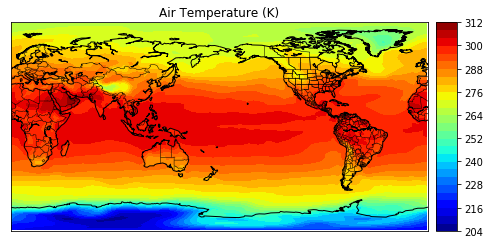

In [5]:
# create figure and axes instances
fig = plt.figure(figsize=(8,5))

# create a Basemap instance.
m = Basemap(llcrnrlon=0., urcrnrlon=360., llcrnrlat=-90, urcrnrlat=90.)

# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add some titles to make the plot readable by someone else
plt.title('Air Temperature (K)')

# make filled contour plot.
#x, y = m(*np.meshgrid(lons,lats))
cs = m.contourf(x, y, tas, 30, cmap=plt.cm.jet)
m.colorbar()
plt.show()

## Define the Map Area

We can define the region we want to display when initializing Basemap:

`m = Basemap(llcrnrlon=0., urcrnrlon=360., llcrnrlat=-90, urcrnrlat=90.)`

- `llcrnrlon`: lower-left corner longitude
- `urcrnrlon`: upper-right corner longitude
- `llcrnrlat`: lower-left corner latitude
- `urcrnrlat`: upper-right corner latitude

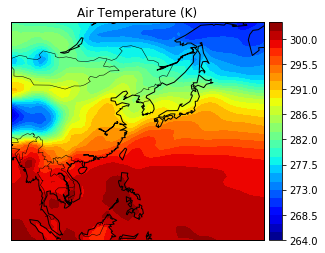

In [6]:
# Now let's make a map of East Asia
m = Basemap(llcrnrlon=90., urcrnrlon=160., llcrnrlat=0., urcrnrlat=60.)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawmapboundary(fill_color='#99ffff')
m.drawstates()
m.drawcountries()
# Add some titles to make the plot readable by someone else
plt.title('Air Temperature (K)')

# make filled contour plot.
cs = m.contourf(x, y, tas, 30, cmap=plt.cm.jet)
m.colorbar()
plt.show()

## Show Point Data on the Map

The data  we have is not always evenly distributed on a grid space. Sometimes we have some point-based observations instead. Let's take the earthquake data we used earlier as an example.

In [7]:
# 氣象局2018年截至11月1日的地震記錄
import pandas as pd
data = pd.read_csv('../data/cwb_earthquake_20181101.csv')
data.head()

,編號,地震時間,經度,緯度,深度,規模,震央位置
0,126,2018/10/31 上午 08:11:00,121.40,23.75,21.5,4.2,花蓮縣政府西南方 35.4 公里 (位於花蓮縣萬榮鄉)
1,小區域,2018/10/31 上午 05:44:00,121.01,23.98,16.1,3.3,南投縣政府東偏北方 33.7 公里 (位於南投縣埔里鎮)
2,小區域,2018/10/28 下午 04:08:00,121.71,24.00,21.0,3.1,花蓮縣政府東方 9.6 公里 (位於花蓮縣近海)
3,小區域,2018/10/26 下午 07:33:00,122.01,23.50,20.3,4.0,花蓮縣政府東南方 67.0 公里 (位於臺灣東部海域)
4,小區域,2018/10/25 上午 03:34:00,120.38,23.21,9.9,2.9,臺南市政府東北方 31.1 公里 (位於臺南市六甲區)


## Show Point Data on the Map

We pull out the lon/lat and then do the plotting:

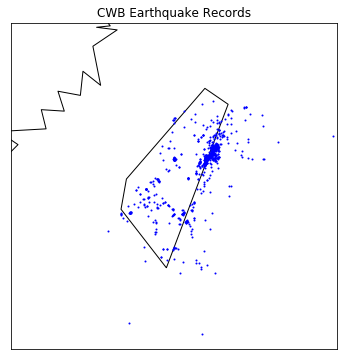

In [8]:
fig = plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=118., urcrnrlon=124., llcrnrlat=20.5, urcrnrlat=26.5)
m.drawcoastlines()
plt.title('CWB Earthquake Records')
lons = data['經度']
lats = data['緯度']
m.plot(lons, lats, 'bo', markersize=1)
plt.show()

## The Resolution  of Basemap

The default resolution of Basemap is 'low' or 'crude', and if we want to use higher resolution map, we need to install the files by:

`conda install basemap-data-hires`

After that, we can use an extra parameter `resolution='h'` to show better looking maps.

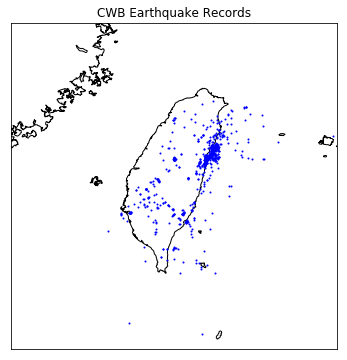

In [9]:
fig = plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=118., urcrnrlon=124., llcrnrlat=20.5, urcrnrlat=26.5,resolution='h')
m.drawcoastlines()
plt.title('CWB Earthquake Records')
m.plot(lons, lats, 'bo', markersize=1)

## Convert Point Data to Density Map

When the number of points is large, we cannot get a clear look on the spatial distribution of the earthquakes. Another way to show it is to calculate the counts of points on the grid. While the full 'matplotlib.pyplot' offers [`hist2d()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) (square grids) and [`hexbin()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html) (hex-grids) , `Basemap` only implements `hexbin()`. 


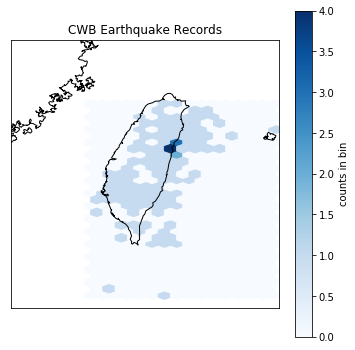

In [10]:
fig = plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=118., urcrnrlon=124., llcrnrlat=20.5, urcrnrlat=26.5, resolution='i')
m.drawcoastlines()
plt.title('CWB Earthquake Records')
#plt.hist2d(lons, lats, bins=30, cmap='Blues')
m.hexbin(lons, lats, gridsize=(15,15), bins=5, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

## Point Interpolation with Scipy

Besides frequency, mapping point-based observations to map grid is also a common taks for geographical dataset.  The library [`scipy.interpolate.griddata()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) provides several ways to do *spatial interpolation*. The following example shows 3 interpolation methods: *nearest*, *linear*, and *cubic*.

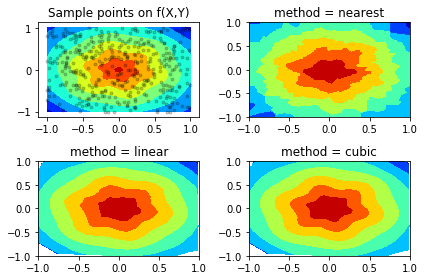

In [11]:
# Example from: 
# https://scipython.com/book/chapter-8-scipy/examples/two-dimensional-interpolation-with-scipyinterpolategriddata/
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)
# Choose npts random point from the discrete domain of our model function
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T, cmap=plt.cm.jet)
ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti, cmap=plt.cm.jet)
    ax[r,c].set_title('method = {}'.format(method))

plt.tight_layout()
plt.show()

## Convert Station Data to Grid Data

By following the example above, we can have convert the PDA station data into grid data. As you have accomplished in the assignment of the **Data Preparation** topic, you can retrieve the PM2.5 time series of each station and combined them together. If you have trouble recalling how to do it, you can look into the reference [PreparePM25FromEPA.ipynb](./PreparePM25FromEPA.ipynb).

Here we just directly use the output data *../data/pm25_2015.csv* for further processing.

In [12]:
pm25 = pd.read_csv('../data/pm25_2015.csv')     # Read in the data
mpm25 = pm25.mean()                             # Calculate the mean of each station
print(pm25.shape)                               # Print out the data dimension
print(mpm25.head())                             # See what we got

(8760, 78)
二林    28.268519
南投    25.969362
埔里    30.715109
大里    27.791389
彰化    23.592143
dtype: float64


## Get the Locations of Stations

In order to do point interpolation, we need the location of EPA stations. This information can be obtained from the EPA website, and we have it downloaded as *../data/epa_stations.csv*.

In [13]:
stations = pd.read_csv('../data/epa_stations.csv')  # Read in the data
staloc = stations.loc[:,['測站名稱','經度','緯度']]  # Retrieve only relevant information.
print(staloc.shape)
print(staloc.head())

(79, 3)
  測站名稱          經度         緯度
0   士林  121.514500  25.105917
1   萬華  121.507972  25.046503
2   大同  121.513311  25.063200
3   中山  121.526528  25.062361
4   古亭  121.529556  25.020608


## Merge the Locations and the Values

Now we have the annual-mean of PM2.5 at 76 stations and a list of locations of 78 stations, and we need to merge them together. This can be easily done by using `pandas.merge()` as introduced in the *Data Preparation* topic.

In [14]:
mpm25loc = pd.merge(staloc, pd.DataFrame(mpm25), left_on='測站名稱', right_index=True)
mpm25loc.head()

,測站名稱,經度,緯度,0
0,士林,121.514500,25.105917,17.489704
1,萬華,121.507972,25.046503,18.893826
2,大同,121.513311,25.063200,17.375758
3,中山,121.526528,25.062361,19.132227
4,古亭,121.529556,25.020608,17.134208


## Set up the grid space for interpolation

In order to perform interpolation, we need to define the grid space to put values into.

In [15]:
# First we define the 4 corners of the grid space
x1tw = 118. 
x2tw = 124.
y1tw = 20.5
y2tw = 26.5
# And then we create the grid space
xtw = np.linspace(x1tw,x2tw,30)
ytw =  np.linspace(y1tw,y2tw,30)
Xtw, Ytw = np.meshgrid(xtw,ytw)

## Interpolation with scipy.interpolate.griddata

And then, we use [`scipy.interpolate.griddata()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) to fill values into the grid space.

In [16]:
# Retrieve the station location and values
lons = mpm25loc['經度']
lats = mpm25loc['緯度']
pm25sta = mpm25loc[0]
pm25grid = griddata((lons, lats), pm25sta, (Xtw, Ytw), method='linear', rescale=True)

## Show the grid data on the map

Now, we can just apply the same tricks as the air-temperature shown above.

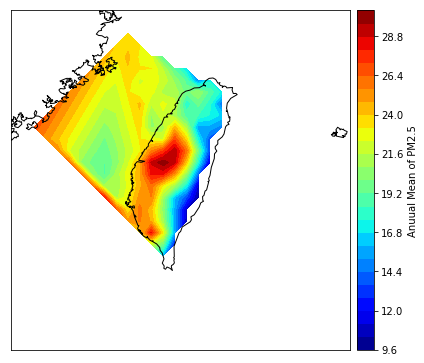

In [17]:
fig = plt.figure(figsize=(6,6))                     # Define the figure size
m = Basemap(llcrnrlon=118., urcrnrlon=124., llcrnrlat=20.5, urcrnrlat=26.5, resolution='i') # Make a map of East Asia
m.contourf(Xtw, Ytw, pm25grid, 30, cmap=plt.cm.jet) # Draw a filled-contour plot with the interpolated grid data
m.drawcoastlines()                                  # Draw the coastlines
cb = m.colorbar()                                   # Show colorbar
cb.set_label('Anuual Mean of PM2.5')                # Add colobar title
plt.tight_layout()
plt.show()

## The limitation of scipy.interpolate.griddata

As show in the figure, the [`scipy.interpolate.griddata()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) only give values within the polygon area surrounded by the stations. The *expolation* feature will be added in future version of *scipy*, but for now we need a work-around: add points to the corners you want to show.

In [18]:
# Make a copy of the dataset
mpm25loc_tw = mpm25loc
# Add 4 fake stations to the 4 corners of the map we want to show
mpm25loc_tw = mpm25loc_tw.append({'測站名稱':'lower_left', '經度':x1tw, '緯度':y1tw, 0:pm25sta.min()}, ignore_index=True)
mpm25loc_tw = mpm25loc_tw.append({'測站名稱':'upper_left', '經度':x1tw, '緯度':y2tw, 0:pm25sta.min()}, ignore_index=True)
mpm25loc_tw = mpm25loc_tw.append({'測站名稱':'lower_right', '經度':x2tw, '緯度':y1tw, 0:pm25sta.min()}, ignore_index=True)
mpm25loc_tw = mpm25loc_tw.append({'測站名稱':'upper_right', '經度':x2tw, '緯度':y2tw, 0:pm25sta.min()}, ignore_index=True)

## Interpolation with a quick work-around

Now that we filled in the four corners with the minimal values in the station data, then we can do the interpolation and plot again.

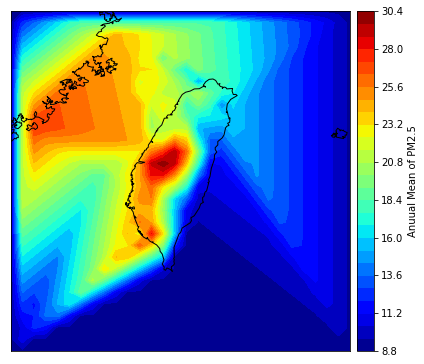

In [19]:
lons2 = mpm25loc_tw['經度']
lats2 = mpm25loc_tw['緯度']
pm25sta2 = mpm25loc_tw[0]

pm25grid = griddata((lons2, lats2), pm25sta2, (Xtw, Ytw), method='linear', rescale=True)

fig = plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=118., urcrnrlon=124., llcrnrlat=20.5, urcrnrlat=26.5, resolution='i')
m.contourf(Xtw, Ytw, pm25grid, 30, cmap=plt.cm.jet)
m.drawcoastlines()
cb = m.colorbar()
cb.set_label('Anuual Mean of PM2.5')
plt.tight_layout()
plt.show()

The results is still not perfect, but we can implement other interpolation method on our own for better results.

# Summary

1. We demostrated how to plot data with Basemap, but it will be replaced by Cartopy soon.
2. The spatial interpolation provided by `scipy.interpolate.griddata()` is limited.
3. `metpy.interpolate.interpolate_to_grid()` has better interpolation, but the usage is more complicated.